In [39]:
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [42]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [43]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [44]:
ride_data_df.isnull().count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [45]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [46]:
(city_data_df['type']=='Suburban').sum()

36

In [47]:
(city_data_df['type']=='Rural').sum()

18

In [48]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [58]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [59]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [60]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [68]:
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']

In [105]:
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [106]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [107]:
suburban_ride_count= suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [108]:
rural_ride_count= rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [109]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [110]:
suburban_avg_fare = sububan_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [111]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [112]:
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [113]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [114]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [115]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

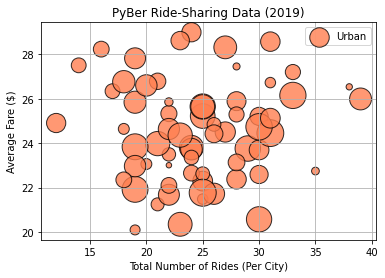

In [135]:
plt.scatter(urban_ride_count, urban_avg_fare, s= [10*urban_driver_count], edgecolor = 'k', linewidths = 1, color='coral', alpha = 0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()



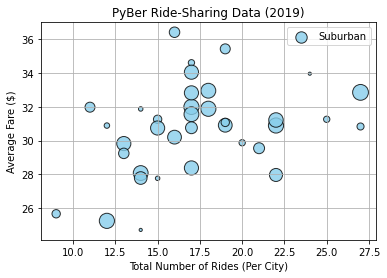

In [139]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

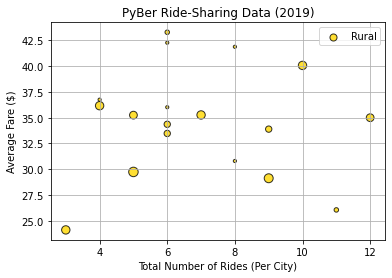

In [141]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

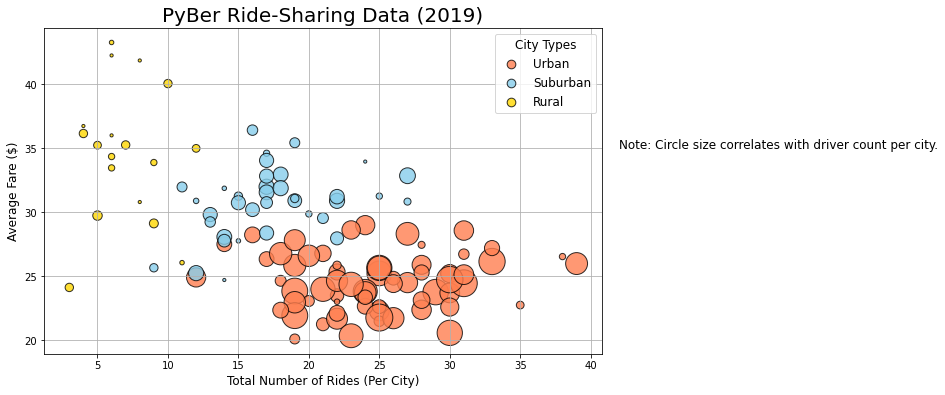

In [164]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title('PyBer Ride-Sharing Data (2019)', Fontsize = 20)
plt.xlabel('Total Number of Rides (Per City)', Fontsize = 12)
plt.ylabel('Average Fare ($)', Fontsize = 12)
plt.grid(True)



# Create a legend
lgnd = plt.legend(fontsize="12",
         scatterpoints=1, loc='best', mode='Expanded', title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize = '12')
# Show the plot
plt.savefig("analysis/Fig1.png")
plt.show()

In [168]:
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [173]:
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [175]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [172]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [176]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [177]:
urban_ride_count.median()

24.0

In [179]:
suburban_ride_count.mode()

0    17
dtype: int64

In [180]:
import numpy as np
import scipy.stats as sts

In [182]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
median_urban_ride_count = sts.median(urban_ride_count)

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


AttributeError: module 'scipy.stats' has no attribute 'median'

city
Huntermouth           24
Lake Jonathanshire    24
Lake Scottton         24
Martinezhaven         24
Roberthaven           24
Simpsonburgh          24
Name: ride_id, dtype: int64

In [193]:
np.median(suburban_ride_count)

17.0

In [195]:
suburban_ride_count[suburban_ride_count==17].count()

7

In [197]:
mode_rural_cities = sts.mode(rural_ride_count)
mode_rural_cities

ModeResult(mode=array([6]), count=array([5]))

In [198]:
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [254]:
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [211]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [210]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

NameError: name 'suburban_fares' is not defined

In [213]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [220]:
suburban_drivers = suburban_cities_df['driver_count']

In [217]:
mean_urban_drivers= np.mean(urban_drivers)
print(mean_urban_drivers)
median_urban_drivers=np.median(urban_drivers)
print(median_urban_drivers)
mode_urban_drivers=sts.mode(urban_drivers)
print(mode_urban_drivers)

36.67815384615385
37.0
ModeResult(mode=array([39]), count=array([86]))


In [221]:
mean_suburban_drivers= np.mean(suburban_drivers)
print(mean_urban_drivers)

36.67815384615385


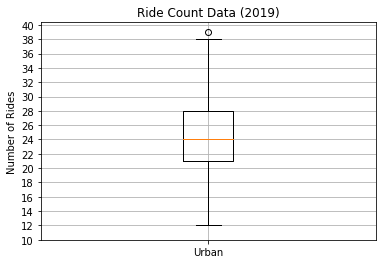

In [222]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [227]:
np.mean(urban_ride_count)

24.62121212121212

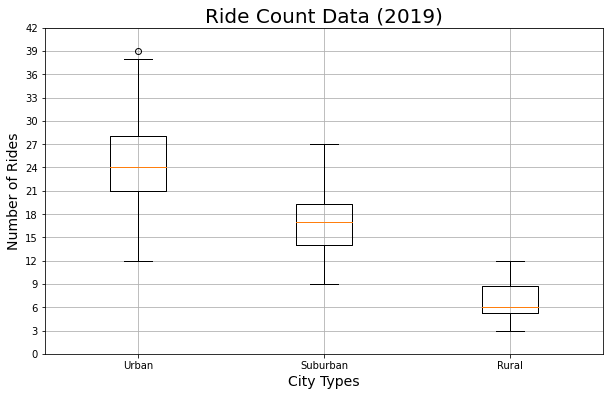

In [228]:
x_labels=['Urban', 'Suburban','Rural']
ride_count_data= [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax= plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', Fontsize=20)
ax.set_ylabel('Number of Rides', Fontsize = 14)
ax.set_xlabel('City Types', Fontsize = 14)
ax.boxplot(ride_count_data, labels= x_labels)
ax.set_yticks(np.arange(0, 45, 3))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

city
Justinberg             30
New Kimberlyborough    30
North Jasmine          30
Royland                30
West Anthony           30
Name: ride_id, dtype: int64

In [243]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
urban_city_outlier

'West Angela'

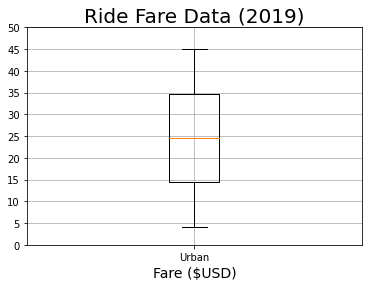

In [251]:
x_labels=['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', Fontsize = 20)
ax.set_xlabel('Fare ($USD)', Fontsize = 14)
ax.set_yticks(np.arange(0,51,5))
ax.grid()
plt.show()

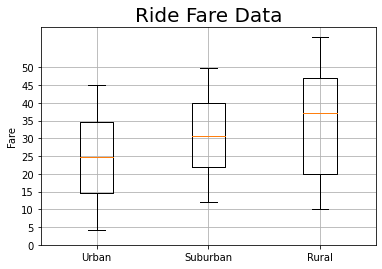

In [274]:
x_labels = ['Urban','Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares_data, labels=x_labels)
ax.set_title('Ride Fare Data', Fontsize = 20)
ax.set_yticks(np.arange(0,51,5))
ax.set_ylabel('Fare')
ax.grid()
plt.show()






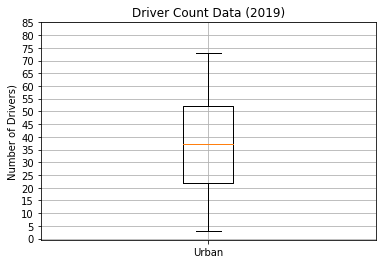

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [258]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [262]:
rural_drivers = rural_cities_df['driver_count']

In [264]:
rural_drivers.sort_values(ascending = False)

2250    9
2334    9
2352    9
2323    9
2290    9
       ..
2359    1
2360    1
2275    1
2274    1
2374    1
Name: driver_count, Length: 125, dtype: int64

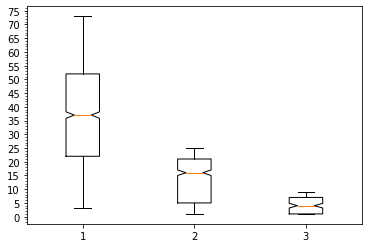

In [273]:
from matplotlib.ticker import MultipleLocator
x_labels = ['urban','suburban', 'rural']
driver_data= [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, x_labels)
ax.set_yticks(np.arange(0,80, 5))
ax.yaxis.set_minor_locator(MultipleLocator(1))

In [275]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [279]:
urban_fares = urban_cities_df['fare'].sum()
urban_fares

39854.380000000005

In [283]:
suburban_fares = suburban_cities_df['fare'].sum()
suburban_fares

19356.33

In [282]:
rural_fares = rural_cities_df['fare'].sum()
rural_fares

4327.929999999999

In [284]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [286]:
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [296]:
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [293]:
total_fares = sum_fares_by_type.sum()
total_fares

63538.6400000001

In [298]:
type_percents = 100* sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

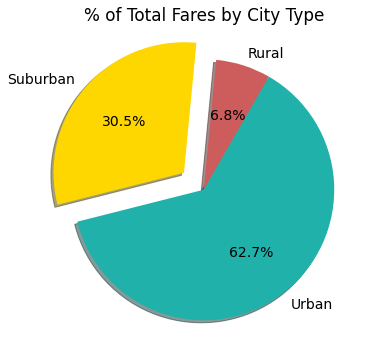

In [320]:
import matplotlib as mpl
explode_values = [0,.2,0]
plt.subplots(figsize=(10,6))
colors = ['indianred','gold','lightseagreen']
plt.pie(type_percents, labels= ['Rural','Suburban','Urban'], colors = colors, explode = explode_values, autopct = "%.1f%%", shadow = True, startangle = 1500 )
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/Fig5.png')

In [315]:
rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [317]:
total_rides = rides_by_type.sum()
total_rides

2375

In [352]:
ride_percents = rides_by_type/total_rides *100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

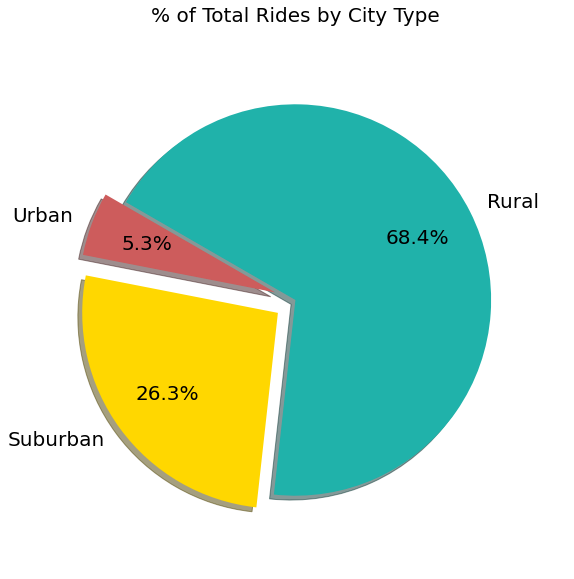

In [353]:
import matplotlib as mpl
plt.figure(figsize = (14,10))
colors=['indianred','gold','lightseagreen']
labels= ['Urban', 'Suburban','Rural']
plt.pie(percent_rides_by_type, labels=labels, radius = .9, colors = colors, pctdistance = .7, autopct = "%.1f%%", shadow = True, explode = [.1,.1,0], startangle = 150)
plt.title('% of Total Rides by City Type', Fontsize = 20)
mpl.rcParams['font.size'] = 20


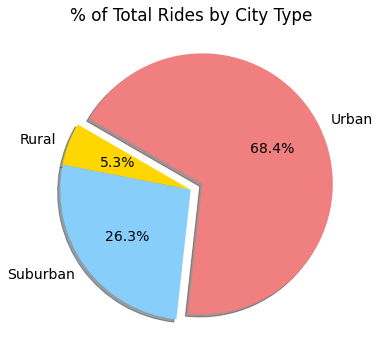

In [355]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [379]:
city_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']
city_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [380]:
total_drivers = city_drivers_by_type.sum()
total_drivers

2973

In [381]:
driver_percents = city_drivers_by_type/total_drivers*100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

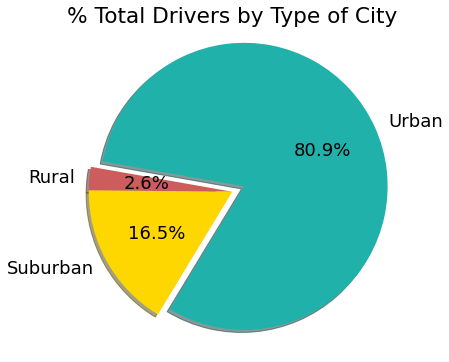

In [382]:
color= ['indianred', 'gold','lightseagreen']
labels = ['Rural', 'Suburban', 'Urban']
explode_values = [0,0,.1]
plt.subplots(figsize=(10,6))
plt.pie(driver_percents, labels=labels, colors=colors, radius = 1.1, autopct = "%.1f%%", shadow=True, pctdistance = .6, explode=explode_values, startangle= 170)
plt.title('% Total Drivers by Type of City')
mpl.rcParams['font.size']= 18
plt.savefig('analysis/Fig7.png')

In [373]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [378]:
city_data_df.sort_values(by='driver_count', ascending = False)

,city,driver_count,type
25,West Samuelburgh,73,Urban
49,South Michelleport,72,Urban
5,West Anthony,70,Urban
30,Liumouth,69,Urban
15,Reynoldsfurt,67,Urban
...,...,...,...
89,South Brenda,1,Suburban
112,North Jaime,1,Rural
113,South Marychester,1,Rural
100,North Richardhaven,1,Suburban


In [377]:
pyber_data_df.sort_values(by='driver_count', ascending = False)

,city,date,fare,ride_id,driver_count,type
1339,West Samuelburgh,2019-01-31 17:10:41,9.67,8851666927116,73,Urban
1342,West Samuelburgh,2019-04-08 12:38:45,14.52,2480520808757,73,Urban
1202,West Samuelburgh,2019-03-07 20:34:09,34.22,1129565554274,73,Urban
54,West Samuelburgh,2019-05-02 13:55:01,38.77,2931685225267,73,Urban
772,West Samuelburgh,2019-04-25 15:55:24,26.44,4338654863099,73,Urban
...,...,...,...,...,...,...
1853,North Richardhaven,2019-03-14 00:49:54,13.09,5413690173766,1,Suburban
2277,North Jaime,2019-03-12 13:05:56,23.21,5987447089759,1,Rural
1851,South Brenda,2019-01-16 03:08:59,20.27,3318227122465,1,Suburban
2274,South Marychester,2019-01-15 21:44:26,30.26,3837056996776,1,Rural
